# Preprocessing

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import random
from tqdm import tqdm_notebook as tqdm
from sklearn.impute import SimpleImputer

In [2]:

%matplotlib inline
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.options.display.max_columns=100
pd.options.display.max_rows=100
sns.set_style("whitegrid")
sns.set_context("poster")
np.random.seed(42)

In [3]:
# ignore deprecation warnings in sklearn

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Specify data directory

data_dir = os.path.join(os.path.dirname(os.getcwd()),'data')

In [5]:
# Set data path

data_path = os.path.join(data_dir, 'BMS_PHDep.csv')

In [6]:
# Set model path

model_dir = os.path.join(os.path.dirname(os.getcwd()), 'model')

In [7]:
# Read dataset

df = pd.read_csv(data_path)

In [8]:
# Take a glimpse

df.head()

,no,sex,age,dx,comp,duration,ph120,ph,vas,sds,pcs,sss8,csi,gen,bipolar,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,extra,agree,consci,neuro,open,aff,sen
0,98,F,75,BMS,1,0.5,0,No,30.0,20.0,25.0,2,2,0.0,0,0,0,0,0,0,0,1,0,0.0,0,0,1,1,0,0,6.0,1,5,5,1,5,5,1,6,6.0,9.0,12,12,7,3.0,1,2
1,325,F,71,BMS,1,1.0,0,No,40.0,56.0,38.0,9,38,5.0,0,0,0,0,0,0,0,0,0,2.0,2,0,1,1,0,0,6.0,1,7,4,5,3,6,1,6,3.0,11.0,13,14,6,10.0,4,2
2,308,M,47,BMS,0,1.0,0,No,0.0,56.0,21.0,4,3,2.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1.0,1,1,5,5,4,4,4,4,4.0,5.0,11,5,9,9.0,0,0
3,57,F,58,BMS,1,1.0,0,No,100.0,57.0,49.0,8,23,4.0,0,3,1,3,3,1,1,3,3,3.0,1,1,3,3,3,3,3.0,1,3,7,1,4,5,3,3,5.0,7.0,12,8,12,4.0,23,12
4,125,F,42,BMS,0,1.0,0,No,40.0,31.0,15.0,9,28,0.0,0,0,0,1,1,0,0,1,0,0.0,0,0,0,0,0,0,5.0,3,5,5,5,3,5,5,4,3.0,10.0,10,8,9,10.0,3,0


In [9]:
# What are the characteristics of the dataset?

print(f"There are {df.shape[0]} observations and {df.shape[1]} features. \n")
print(f"The features are: {df.columns.tolist()}. \n")
print(f"There are {df.isnull().sum().values.sum()} missing values. \n")
print(f"The number of unique values for each column is: \n{df.nunique()}.")

There are 248 observations and 47 features. 

The features are: ['no ', 'sex', 'age', 'dx', 'comp', 'duration', 'ph120', 'ph', 'vas', 'sds', 'pcs', 'sss8', 'csi', 'gen', 'bipolar', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 'extra', 'agree', 'consci', 'neuro', 'open', 'aff', 'sen']. 

There are 16 missing values. 

The number of unique values for each column is: 
no          248
sex           2
age          54
dx            1
comp          2
duration     37
ph120         2
ph           12
vas          84
sds          47
pcs          50
sss8         26
csi          58
gen           6
bipolar       2
m1            4
m2            4
m3            4
m4            4
m5            4
m6            4
m7            4
m8            4
m9            4
m10           4
m11           4
m12           4
m13           4
m14           4
m15           4
t1            7
t2            7
t3      

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 47 columns):
no          248 non-null int64
sex         248 non-null object
age         248 non-null int64
dx          248 non-null object
comp        248 non-null int64
duration    247 non-null float64
ph120       248 non-null int64
ph          248 non-null object
vas         245 non-null float64
sds         245 non-null float64
pcs         247 non-null float64
sss8        248 non-null int64
csi         248 non-null int64
gen         245 non-null float64
bipolar     248 non-null int64
m1          248 non-null int64
m2          248 non-null int64
m3          248 non-null int64
m4          248 non-null int64
m5          248 non-null int64
m6          248 non-null int64
m7          248 non-null int64
m8          248 non-null int64
m9          247 non-null float64
m10         248 non-null int64
m11         248 non-null int64
m12         248 non-null int64
m13         248 non-null int64
m14         

In [11]:
# Drop the a few column, specify numeric and categorical data

df = df.drop(["no ", "ph", "dx", "comp", "csi"], axis = 1, errors='ignore')
labels = ['aff', 'sen']
categorical_feats = ["sex", "ph120", "bipolar"]
numeric_feats = [feat for feat in df.columns.tolist() if feat not in categorical_feats + labels]

In [12]:
# Convert data into numeric/categorical type
for feat in numeric_feats:
    df[feat] = pd.to_numeric(df[feat],errors='coerce')
    
for feat in categorical_feats:
    df[feat] = df[feat].astype('category')
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 42 columns):
sex         248 non-null category
age         248 non-null int64
duration    247 non-null float64
ph120       248 non-null category
vas         245 non-null float64
sds         245 non-null float64
pcs         247 non-null float64
sss8        248 non-null int64
gen         245 non-null float64
bipolar     248 non-null category
m1          248 non-null int64
m2          248 non-null int64
m3          248 non-null int64
m4          248 non-null int64
m5          248 non-null int64
m6          248 non-null int64
m7          248 non-null int64
m8          248 non-null int64
m9          247 non-null float64
m10         248 non-null int64
m11         248 non-null int64
m12         248 non-null int64
m13         248 non-null int64
m14         248 non-null int64
m15         248 non-null int64
t1          247 non-null float64
t2          248 non-null int64
t3          248 non-null int64
t4  

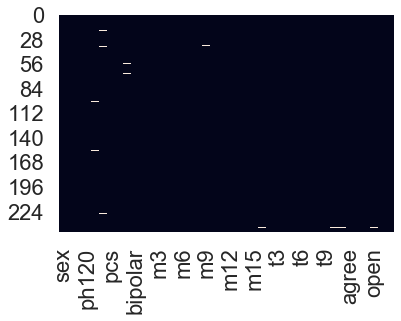

In [13]:
# Visualize missing values

sns.heatmap(df.isnull(), cbar=False)

# EDA

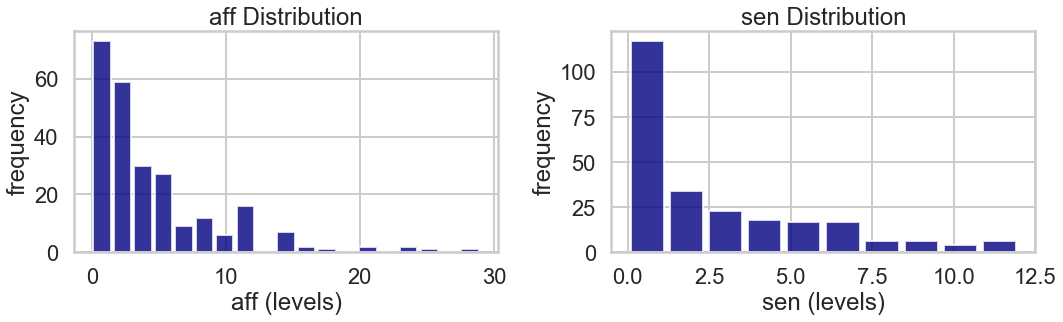

In [14]:
# Explore label with histogram

unit_map_dict = {"aff": "levels",
                "sen": "levels"}
f,a = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df[labels[idx]], bins='auto', color='navy', alpha = 0.8, rwidth=0.85)
    ax.set_title(labels[idx] + " Distribution")
    ax.set_xlabel(labels[idx] + f" ({unit_map_dict[labels[idx]]})")
    ax.set_ylabel("frequency")
plt.tight_layout()
plt.show()

<Figure size 28800x3600 with 0 Axes>

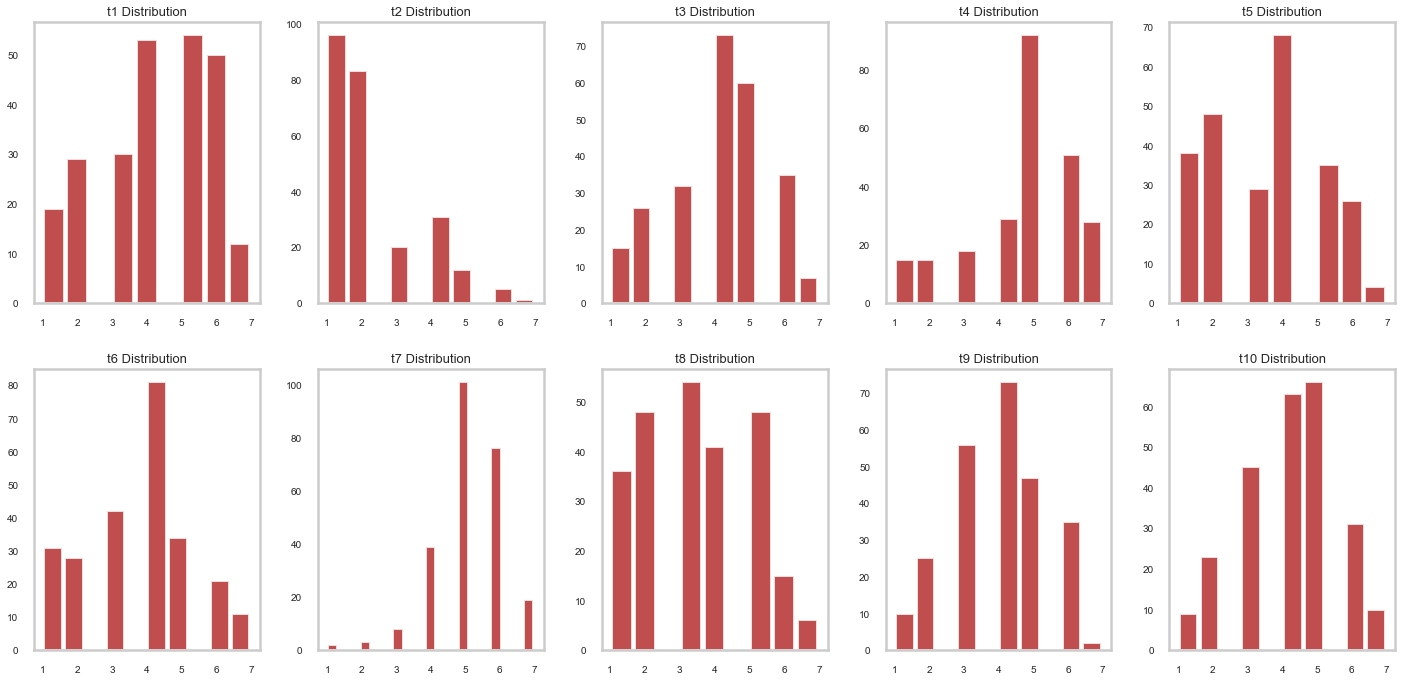

In [15]:
# Explore tipi questionaires with histogram

tipi_list = ["t"+str(q_number) for q_number in list(range(1,11))]
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':13,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
plt.figure(figsize = [400,50])
f,a = plt.subplots(nrows = 2, ncols = 5, figsize=(20,10))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df[tipi_list[idx]], bins='auto', color='firebrick', alpha = 0.8, rwidth=0.85)
    ax.set_title(df[tipi_list].columns[idx] + " Distribution")
    ax.grid(False)
    #ax.set_xlabel(numeric_feats[idx])
    #ax.set_ylabel("frequency")
plt.tight_layout()
plt.show()

<Figure size 28800x3600 with 0 Axes>

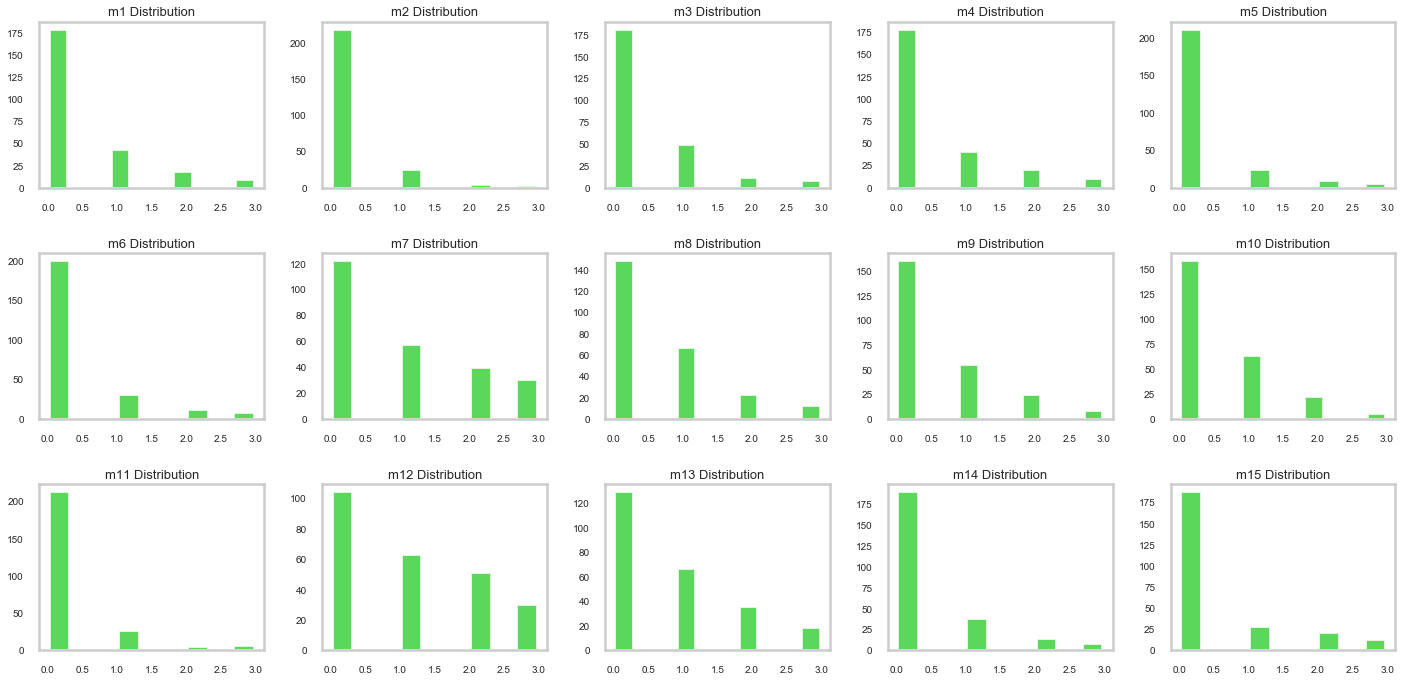

In [16]:
# Explore magill questionaires with histogram

mcgill_list = ["m"+str(q_number) for q_number in list(range(1,16))]
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':13,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
plt.figure(figsize = [400,50])
f,a = plt.subplots(nrows = 3, ncols = 5, figsize=(20,10))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df[mcgill_list[idx]], bins='auto', color='limegreen', alpha = 0.8, rwidth=0.85)
    ax.set_title(df[mcgill_list].columns[idx] + " Distribution")
    ax.grid(False)
    #ax.set_xlabel(numeric_feats[idx])
    #ax.set_ylabel("frequency")
plt.tight_layout()
plt.show()

<Figure size 28800x3600 with 0 Axes>

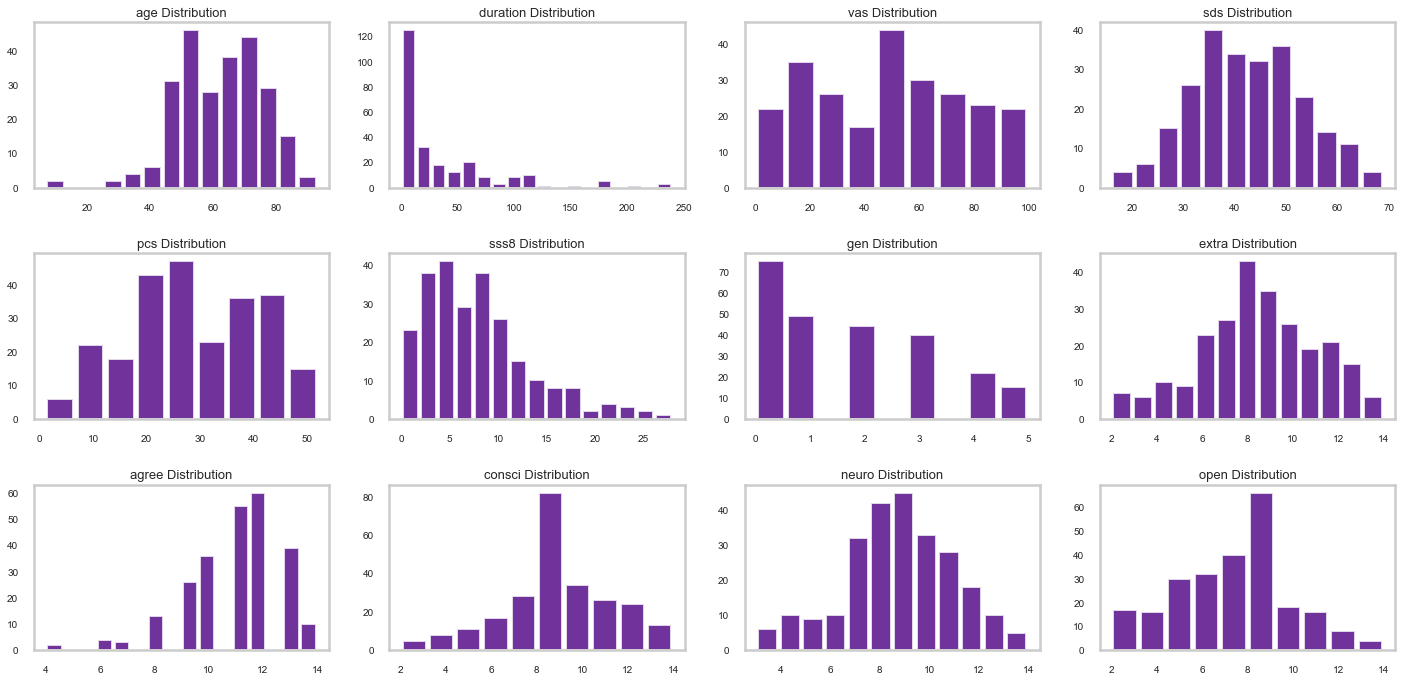

In [17]:
# Explore other numeric variables

other_numerics = [col for col in df[numeric_feats].columns.tolist() if col not in tipi_list + mcgill_list + labels]
params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize':13,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
plt.figure(figsize = [400,50])
f,a = plt.subplots(nrows = 3, ncols = 4, figsize=(20,10))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df[other_numerics[idx]], bins='auto', color='indigo', alpha = 0.8, rwidth=0.85)
    ax.set_title(df[other_numerics].columns[idx] + " Distribution")
    ax.grid(False)
    #ax.set_xlabel(numeric_feats[idx])
    #ax.set_ylabel("frequency")
plt.tight_layout()
plt.show()

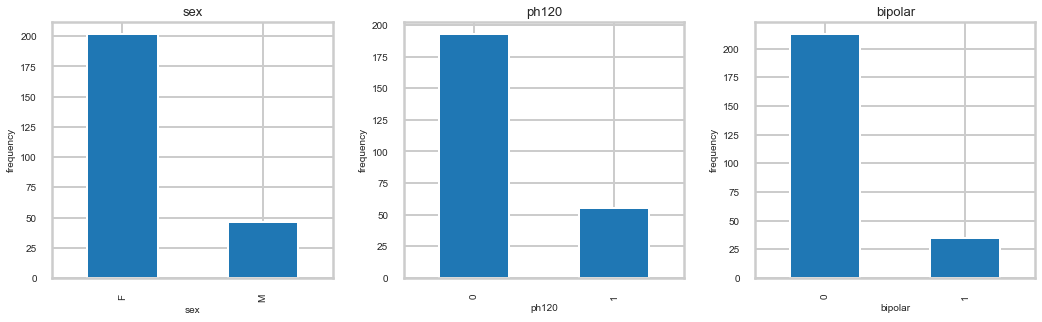

In [18]:
# Explore categorical features with barplot

f,a = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
a = a.ravel()
for idx,ax in enumerate(a):
    df[categorical_feats[idx]].value_counts().plot(kind='bar', ax = ax)
    ax.set_title(df[categorical_feats].columns[idx])
    ax.set_xlabel(categorical_feats[idx])
    ax.set_ylabel("frequency")
plt.tight_layout()

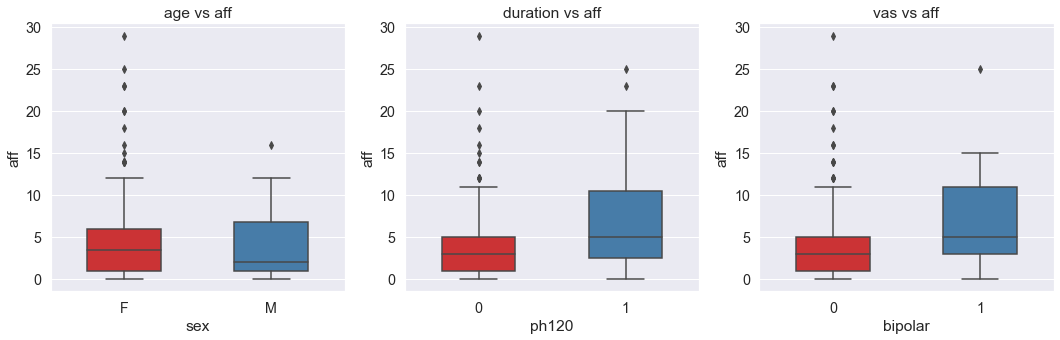

In [19]:
# Explore categorical in relation with label with boxplots (aff)

sns.set(font_scale = 1.3)
f,a = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
a = a.ravel()
for idx,ax in enumerate(a):
    sns.boxplot(x = categorical_feats[idx], y = 'aff', data = df, ax = ax, width = 0.5, palette='Set1')
    ax.set_title(df[numeric_feats].columns[idx] + " vs aff")
plt.tight_layout()
plt.show()

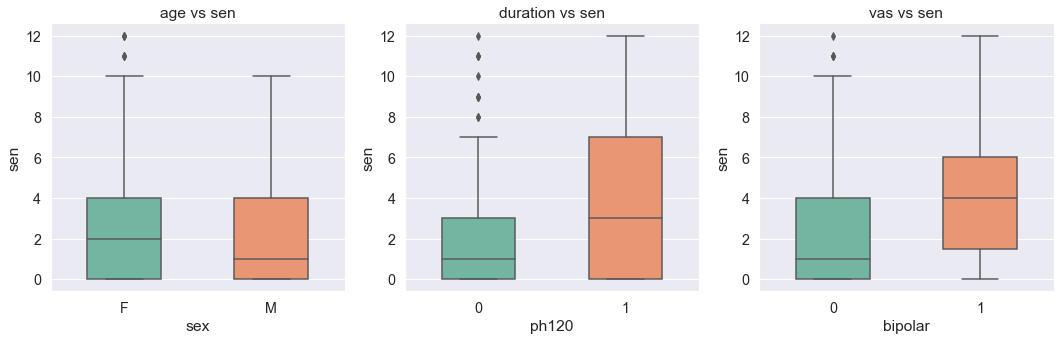

In [20]:
# Explore categorical in relation with label with boxplots (sen)

sns.set(font_scale = 1.3)
f,a = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
a = a.ravel()
for idx,ax in enumerate(a):
    sns.boxplot(x = categorical_feats[idx], y = 'sen', data = df, ax = ax, width = 0.5, palette='Set2')
    ax.set_title(df[numeric_feats].columns[idx] + " vs sen")
plt.tight_layout()
plt.show()

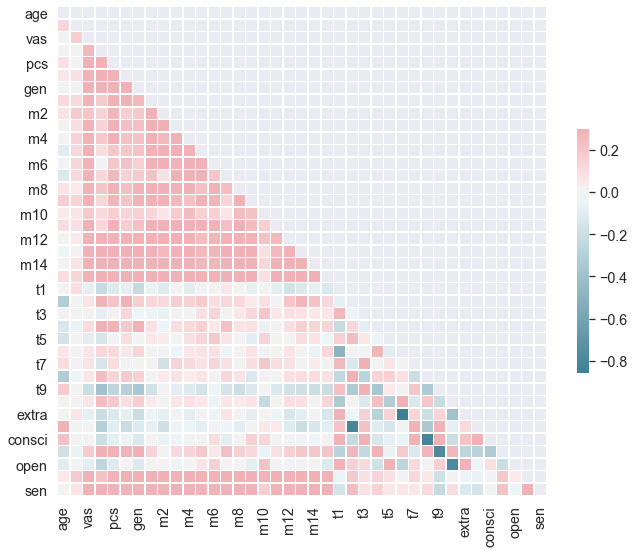

In [21]:
# Compute the correlation matrix with .corr()
corr = df[numeric_feats + labels].corr()

# Generate a mask for the upper triangle so that we can simplify the plot
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [22]:
# What are the highly correlated variable pairs?

threshold = 0.66
rows, cols = corr.shape
flds = list(corr.columns)

for i in range(rows):
    for j in range(i+1, cols):
        if corr.iloc[i,j] > threshold or corr.iloc[i,j] < threshold * (-1):
            print(flds[i], " is highly correlated with ", flds[j])

m1  is highly correlated with  aff
m3  is highly correlated with  aff
m4  is highly correlated with  aff
m6  is highly correlated with  aff
m12  is highly correlated with  m13
m12  is highly correlated with  sen
m13  is highly correlated with  sen
m14  is highly correlated with  sen
m15  is highly correlated with  sen
t1  is highly correlated with  extra
t2  is highly correlated with  agree
t3  is highly correlated with  consci
t4  is highly correlated with  neuro
t5  is highly correlated with  open
t6  is highly correlated with  extra
t7  is highly correlated with  agree
t8  is highly correlated with  consci
t9  is highly correlated with  neuro
t10  is highly correlated with  open


# Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, ElasticNet,SGDRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
import pickle

In [24]:
# Make X and y

X_raw = pd.concat([df[numeric_feats], df[categorical_feats]], axis=1, sort=False)
y_aff = df.aff
y_sen = df.sen
indices = X_raw.index
cols = X_raw.columns.tolist()

In [25]:
# Impute numerical columns with mean, impute categorical column with most frequent

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X_raw[numeric_feats].values)
X_numeric = imputer.transform(X_raw[numeric_feats])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(X_raw[categorical_feats].values)
X_cat = imputer.transform(X_raw[categorical_feats])

In [26]:
# Combine results of imputation

X = pd.DataFrame(np.concatenate((X_numeric, X_cat), axis = 1), columns = cols)

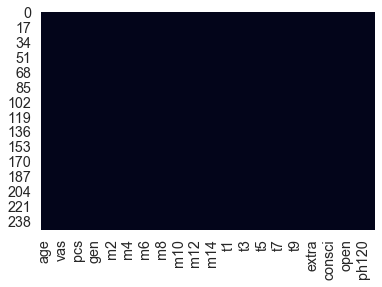

In [27]:
sns.heatmap(X.isnull(), cbar=False)

In [28]:
for feat in numeric_feats:
    X[feat] = pd.to_numeric(X[feat],errors='coerce')
    
for feat in categorical_feats:
    X[feat] = X[feat].astype('category')
    
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 40 columns):
age         248 non-null float64
duration    248 non-null float64
vas         248 non-null float64
sds         248 non-null float64
pcs         248 non-null float64
sss8        248 non-null float64
gen         248 non-null float64
m1          248 non-null float64
m2          248 non-null float64
m3          248 non-null float64
m4          248 non-null float64
m5          248 non-null float64
m6          248 non-null float64
m7          248 non-null float64
m8          248 non-null float64
m9          248 non-null float64
m10         248 non-null float64
m11         248 non-null float64
m12         248 non-null float64
m13         248 non-null float64
m14         248 non-null float64
m15         248 non-null float64
t1          248 non-null float64
t2          248 non-null float64
t3          248 non-null float64
t4          248 non-null float64
t5          248 non-null float64
t6  

In [29]:
X.sex = [1 if gender == "M" else 0 for gender in X.sex]

# predicting y_sen

In [30]:
Xtrain, Xtest, ytrain, ytest, itrain, itest = train_test_split(X, y_sen, indices, train_size = 0.8, random_state = 42)

In [31]:
print(Xtrain.shape)
print(Xtest.shape)

(198, 40)
(50, 40)


## Linear Regression

In [32]:
steps = [('scaler', StandardScaler()),
         ('lr', LinearRegression())]
pipeline = Pipeline(steps)
parameters = {'scaler__with_mean':[True, False],
              'lr__fit_intercept':[True, False]}
reg = GridSearchCV(pipeline, parameters, cv = 10, scoring="explained_variance")
reg.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'lr__fit_intercept': [True, False],
                         'scaler__with_mean': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [33]:
reg.best_params_

{'lr__fit_intercept': True, 'scaler__with_mean': True}

In [34]:
Xtrain_scaled = StandardScaler().fit_transform(Xtrain)
lm = LinearRegression()
lm.fit(Xtrain_scaled, ytrain)
print(lm.intercept_)
print(lm.coef_)

2.3686868686868685
[-3.61443998e-17  5.82867088e-16 -3.08984551e-16  5.94995408e-16
 -2.13520086e-16  8.77984828e-16 -1.61289143e-16  6.30704249e-16
 -3.25309073e-16 -3.50201337e-16 -3.13833358e-16 -2.44465642e-16
 -2.02686714e-16 -6.46165932e-16  8.87261959e-16  8.84105658e-16
  8.43045289e-17 -4.28875571e-16  1.04677124e+00  9.16078644e-01
  6.65977605e-01  7.58181576e-01  9.04282753e-04 -1.88954978e-03
 -3.45351945e-04 -6.85650637e-04 -1.48931399e-03 -8.77221817e-04
  1.53094586e-03  3.74693698e-04  5.91985808e-04  1.27409677e-03
 -1.54215237e-03 -2.46209554e-03  5.88034983e-04  1.05100635e-03
  2.22881371e-03 -1.83013327e-16 -9.98767041e-16 -1.03216047e-16]


In [35]:
Xtest_scaled = StandardScaler().fit_transform(Xtest)
lm.score(Xtest_scaled, ytest)

0.8704564582434633

## SVR

In [36]:
steps = [('scaler', StandardScaler()),
         ('svr', SVR())]
pipeline = Pipeline(steps)
parameters = {'svr__kernel':["linear", "poly", "rbf", "sigmoid"],
             'svr__C':[0.01, 0.1, 1, 10, 100]}
reg = GridSearchCV(pipeline, parameters, cv = 10, scoring="explained_variance")
reg.fit(Xtrain, ytrain)
reg.best_params_

{'svr__C': 1, 'svr__kernel': 'linear'}

In [37]:
Xtrain_scaled = StandardScaler().fit_transform(Xtrain)
svrm = SVR(C = 1, kernel = 'linear')
svrm.fit(Xtrain_scaled , ytrain)
print(svrm.support_vectors_)
print(svrm.coef_)

[[-0.46031692 -0.68731901 -0.74570759 ... -0.47938884  1.92724822
  -0.40583972]
 [-1.47867168 -0.38439377  0.48827139 ... -0.47938884 -0.51887452
  -0.40583972]
 [ 0.26707933 -0.25456867  1.10526087 ... -0.47938884 -0.51887452
  -0.40583972]
 ...
 [-1.26045281 -0.53585639  1.32302187 ... -0.47938884  1.92724822
  -0.40583972]
 [ 1.13995484 -0.47094384  0.99638037 ...  2.0859893   1.92724822
   2.4640269 ]
 [-0.89675468 -0.53585639  0.81491288 ... -0.47938884 -0.51887452
   2.4640269 ]]
[[-1.26330000e-02 -6.09635189e-03  1.87217571e-02  2.04468258e-02
   1.60556540e-02  5.86703744e-03 -7.93854739e-03  2.02628214e-02
   6.95462853e-03  6.91216314e-03 -5.97801730e-03  6.95010103e-03
  -1.10638116e-02 -1.51304675e-03  8.71854988e-03  1.57502685e-02
  -1.23405679e-02 -1.12480929e-03  1.00196366e+00  8.88839746e-01
   6.62504952e-01  7.34631002e-01 -8.52963609e-03  6.21455900e-04
   4.56029178e-03 -7.49601309e-03  1.44394611e-02 -4.13167251e-03
   6.80245774e-03 -4.91667233e-03  3.40311047e

In [38]:
Xtest_scaled = StandardScaler().fit_transform(Xtest)
svrm.score(Xtest_scaled, ytest)

0.8691408910257558

# Elastic Net

In [39]:
steps = [('scaler', StandardScaler()),
         ('en', ElasticNet())]
pipeline = Pipeline(steps)
parameters = {'en__alpha':[0.01, 0.1, 1, 10, 100],
             'en__l1_ratio':[0,0.25,0.5,0.75,1]}
reg = GridSearchCV(pipeline, parameters, cv = 10, scoring="explained_variance")
reg.fit(Xtrain, ytrain)
reg.best_params_

{'en__alpha': 0.01, 'en__l1_ratio': 0.75}

In [40]:
Xtrain_scaled = StandardScaler().fit_transform(Xtrain)
enm = ElasticNet(alpha = 0.01, l1_ratio = 0.75)
enm.fit(Xtrain_scaled , ytrain)
print(enm.intercept_)
print(enm.coef_)

2.3686868686868685
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.04341094  0.9112528   0.66472701  0.75347485 -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.          0.        ]


In [41]:
Xtest_scaled = StandardScaler().fit_transform(Xtest)
enm.score(Xtest_scaled, ytest)

0.8692794501866715

# predicting y_aff

In [42]:
Xtrain, Xtest, ytrain, ytest, itrain, itest = train_test_split(X, y_aff, indices, train_size = 0.8, random_state = 42)

In [43]:
print(Xtrain.shape)
print(Xtest.shape)

(198, 40)
(50, 40)


## Linear Regression

In [44]:
steps = [('scaler', StandardScaler()),
         ('lr', LinearRegression())]
pipeline = Pipeline(steps)
parameters = {'scaler__with_mean':[True, False],
              'lr__fit_intercept':[True, False]}
reg = GridSearchCV(pipeline, parameters, cv = 10, scoring="explained_variance")
reg.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'lr__fit_intercept': [True, False],
                         'scaler__with_mean': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [45]:
reg.best_params_

{'lr__fit_intercept': True, 'scaler__with_mean': False}

In [46]:
Xtrain_scaled = StandardScaler(with_mean = False).fit_transform(Xtrain)
lm = LinearRegression()
lm.fit(Xtrain_scaled, ytrain)
print(lm.intercept_)
print(lm.coef_)

32507329525.496674
[-7.34773515e-04  6.46808994e-04  4.61039369e-03  3.60907706e-03
 -7.14404887e-03  1.83610981e-03  8.53677605e-04  7.80108248e-01
  4.82180370e-01  6.63932115e-01  8.06841968e-01  6.08377284e-01
  6.77246242e-01  1.04814199e+00  8.53317195e-01  7.88278081e-01
  7.36972010e-01  5.17688339e-01  9.79730437e-04  1.21042348e-03
  4.93021884e-04 -1.04406184e-03 -3.44570452e+10 -3.99469903e+10
 -1.75132927e+10  2.02462728e+10 -1.05379481e+10  3.34259077e+10
  3.23657413e+10  1.90012552e+10 -1.74804857e+10  9.01513432e+09
  5.87626090e+10 -5.20511858e+10  2.98200979e+10 -3.10346993e+10
  1.57704308e+10  1.23800250e-03  1.63494300e-03 -2.86152742e-04]


In [47]:
Xtest_scaled = StandardScaler().fit_transform(Xtest)
lm.score(Xtest_scaled, ytest)

-6.3350942885296595e+19

## SVR

In [48]:
steps = [('scaler', StandardScaler()),
         ('svr', SVR())]
pipeline = Pipeline(steps)
parameters = {'svr__kernel':["linear", "poly", "rbf", "sigmoid"],
             'svr__C':[0.01, 0.1, 1, 10, 100]}
reg = GridSearchCV(pipeline, parameters, cv = 10, scoring="explained_variance")
reg.fit(Xtrain, ytrain)
reg.best_params_

{'svr__C': 0.1, 'svr__kernel': 'linear'}

In [49]:
Xtrain_scaled = StandardScaler().fit_transform(Xtrain)
svrm = SVR(C = 0.1, kernel = 'linear')
svrm.fit(Xtrain_scaled , ytrain)
print(svrm.support_vectors_)
print(svrm.coef_)

[[ 1.21269447  0.52438195  0.56085838 ...  2.0859893  -0.51887452
  -0.40583972]
 [-0.89675468 -0.60076894 -0.0198376  ... -0.47938884 -0.51887452
  -0.40583972]
 [-0.46031692 -0.68731901 -0.74570759 ... -0.47938884  1.92724822
  -0.40583972]
 ...
 [ 0.77625671  0.52438195  1.75854386 ... -0.47938884 -0.51887452
  -0.40583972]
 [-0.31483767 -0.62240645 -0.45535959 ...  2.0859893  -0.51887452
   2.4640269 ]
 [ 1.13995484 -0.49258135 -1.25381658 ... -0.47938884 -0.51887452
  -0.40583972]]
[[ 4.08678700e-03  7.48789969e-03  3.03498448e-02 -7.70343185e-03
  -2.95001371e-03  3.90922041e-03  5.96021406e-03  7.55218773e-01
   4.92073463e-01  6.61003825e-01  8.00346265e-01  6.05178555e-01
   6.74782469e-01  1.00944547e+00  8.51164686e-01  7.63658592e-01
   7.20818336e-01  5.26848187e-01  1.74035277e-03  1.58972770e-02
   2.77679321e-04  1.23296380e-02  9.60126707e-03  5.99568201e-03
  -1.25341134e-02  4.76278549e-03  1.32088983e-03  1.38609131e-03
   1.63060208e-02  3.99415419e-03 -1.35916624e

In [50]:
Xtest_scaled = StandardScaler().fit_transform(Xtest)
svrm.score(Xtest_scaled, ytest)

0.957694499346085

# Elastic Net

In [51]:
steps = [('scaler', StandardScaler()),
         ('en', ElasticNet())]
pipeline = Pipeline(steps)
parameters = {'en__alpha':[0.01, 0.1, 1, 10, 100],
             'en__l1_ratio':[0,0.25,0.5,0.75,1]}
reg = GridSearchCV(pipeline, parameters, cv = 10, scoring="explained_variance")
reg.fit(Xtrain, ytrain)
reg.best_params_

{'en__alpha': 0.01, 'en__l1_ratio': 0.75}

In [52]:
Xtrain_scaled = StandardScaler().fit_transform(Xtrain)
enm = ElasticNet(alpha = 0.01, l1_ratio = 0.75)
enm.fit(Xtrain_scaled , ytrain)
print(enm.intercept_)
print(enm.coef_)

4.44949494949495
[ 0.          0.          0.00522096  0.          0.          0.
  0.          0.77730414  0.47911723  0.66762514  0.80166367  0.60777658
  0.67680402  1.04051875  0.85301342  0.78195019  0.73204961  0.51465418
  0.00121823  0.          0.          0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.        ]


In [53]:
Xtest_scaled = StandardScaler().fit_transform(Xtest)
enm.score(Xtest_scaled, ytest)

0.9569921154020062